

```
Importing the Datasets

can be used to recognize only single digit
```



In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

Loading the MNIST Datasets from Keras.datasets

In [4]:
(X_train,Y_train),(X_test,Y_test) = mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [5]:
type(X_train)

numpy.ndarray

Knowing the shape of the data and number of observations

In [6]:
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


Training data -> 60000 images
Test data -> 10000 images
Image Size -> 28 x 28 pixels
Gray Scale Image ->only 1 channel

In [7]:
print(X_train[10])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  42 118 219 166 118 118   6
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0 103 242 254 254 254 254 254  66
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  18 232 254 254 254 254 254 238
   70   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 104 244 254 224 254 254 254
  141   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0 207 254 210 25

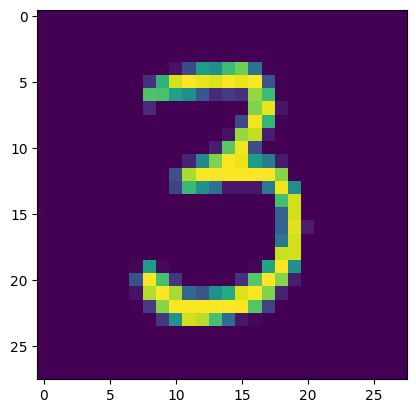

3


In [8]:
plt.imshow(X_train[50])
plt.show()
print(Y_train[50])

In [9]:
print(np.unique(Y_train))
print(np.unique(Y_test))

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]


All the images have the same dimensions in the dataset so there is no need to resize the images of the dataset.

In [10]:
# we have to do the normalization to bring all the data back to the normal scale
X_train = X_train/255
X_test = X_test/255

In [11]:
print(X_train[10])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28,28)),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

In [13]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])

Loss value-> Distance between the true value and the predicted value

In [14]:
model.fit(X_train,Y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2956 - accuracy: 0.9146
Epoch 2/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1343 - accuracy: 0.9596
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0986 - accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0802 - accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0658 - accuracy: 0.9796
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0576 - accuracy: 0.9819
Epoch 7/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0495 - accuracy: 0.9839
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0443 - accuracy: 0.9858
Epoch 9/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0368 - accuracy: 0.9883
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.033

Training data accuracy -> 98.9%

In [16]:
loss, accuracy = model.evaluate(X_test,Y_test)
print("Accuracy on the Test data: ", accuracy)

313/313 [==============================] - 0s 1ms/step - loss: 0.0957 - accuracy: 0.9749
Accuracy on the Test data:  0.9749000072479248


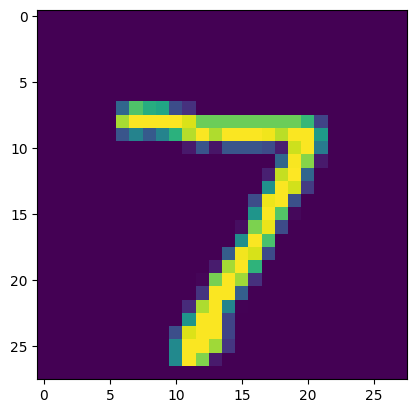

In [17]:
plt.imshow(X_test[0])
plt.show()

In [18]:
print(Y_test[0])

7


In [19]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 0s 896us/step


In [21]:
print(Y_pred.shape)

(10000, 10)


In [22]:
print(Y_pred[0])

[7.5950165e-06 4.6917899e-03 2.1094704e-01 8.4687847e-01 3.8719070e-05
 5.9497993e-02 1.2652322e-06 9.9999797e-01 1.1883206e-02 2.4354415e-02]


In [23]:
label_for_first_test_image = np.argmax(Y_pred[0])
print(label_for_first_test_image)

7


In [24]:
Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

In [25]:
print(Y_pred)

[[7.59501654e-06 4.69178986e-03 2.10947037e-01 ... 9.99997973e-01
  1.18832057e-02 2.43544150e-02]
 [6.28802582e-06 9.95442629e-01 9.99999106e-01 ... 5.04123280e-04
  3.93317640e-03 1.25503927e-08]
 [9.62348189e-04 9.99539375e-01 2.40269303e-01 ... 1.58344686e-01
  4.00977045e-01 1.10384535e-04]
 ...
 [5.16373646e-08 1.08897605e-03 2.52276283e-10 ... 1.03133515e-01
  3.12810211e-04 4.47914034e-01]
 [3.11543977e-06 9.09074617e-04 1.24361987e-09 ... 7.63532415e-04
  8.51625085e-01 2.28626519e-07]
 [3.77152264e-02 6.06804807e-03 2.67243831e-06 ... 5.34410710e-12
  4.98826103e-03 7.42745954e-08]]


In [26]:
print(Y_pred_labels)

[7, 2, 1, 0, 4, 1, 4, 9, 5, 9, 0, 6, 9, 0, 1, 5, 9, 7, 3, 4, 9, 6, 6, 5, 4, 0, 7, 4, 0, 1, 3, 1, 3, 4, 7, 2, 7, 1, 2, 1, 1, 7, 4, 2, 3, 5, 1, 2, 4, 4, 6, 3, 5, 5, 6, 0, 4, 1, 9, 5, 7, 8, 9, 3, 7, 4, 6, 4, 3, 0, 7, 0, 2, 9, 1, 7, 3, 2, 9, 7, 7, 6, 2, 7, 8, 4, 7, 3, 6, 1, 3, 6, 9, 3, 1, 4, 1, 7, 6, 9, 6, 0, 5, 4, 9, 9, 2, 1, 9, 4, 8, 7, 3, 9, 7, 9, 4, 4, 9, 2, 5, 4, 7, 6, 7, 9, 0, 5, 8, 5, 6, 6, 5, 7, 8, 1, 0, 1, 6, 4, 6, 7, 3, 1, 7, 1, 8, 2, 0, 2, 9, 8, 5, 5, 1, 5, 6, 0, 3, 4, 4, 6, 5, 4, 6, 5, 4, 5, 1, 4, 4, 7, 2, 3, 2, 7, 1, 8, 1, 8, 1, 8, 5, 0, 8, 9, 2, 5, 0, 1, 1, 1, 0, 9, 0, 3, 1, 6, 4, 2, 3, 6, 1, 1, 1, 3, 9, 5, 2, 9, 4, 5, 9, 3, 9, 0, 3, 6, 5, 5, 7, 2, 2, 7, 1, 2, 8, 4, 1, 7, 3, 3, 8, 8, 7, 9, 2, 2, 4, 1, 5, 9, 8, 7, 2, 3, 0, 6, 4, 2, 4, 1, 9, 5, 7, 7, 2, 8, 2, 6, 8, 5, 7, 7, 9, 1, 8, 1, 8, 0, 3, 0, 1, 9, 9, 4, 1, 8, 2, 1, 2, 9, 7, 5, 9, 2, 6, 4, 1, 5, 8, 2, 9, 2, 0, 4, 0, 0, 2, 8, 4, 7, 1, 2, 4, 0, 2, 7, 4, 3, 3, 0, 0, 3, 1, 9, 6, 5, 2, 5, 9, 7, 9, 3, 0, 4, 2, 0, 7, 1, 1, 2, 1, 

y_test-> true labels
y_pred_labels -> predicted by our model

In [27]:
confusion_mat = confusion_matrix(Y_test,Y_pred_labels)

In [28]:
print(confusion_mat)

tf.Tensor(
[[ 948    0    4    2    1   10    5    1    6    3]
 [   0 1126    3    1    0    0    2    0    3    0]
 [   1    1 1008    5    4    1    4    3    5    0]
 [   0    0    8  976    0   14    2    3    4    3]
 [   0    0    1    1  964    0    4    3    2    7]
 [   0    0    0    9    2  871    4    1    3    2]
 [   2    2    4    1    6    7  933    0    3    0]
 [   0    5   11    2    2    0    0 1001    3    4]
 [   1    1    2    7    3    5    1    4  947    3]
 [   1    3    0    4   11    5    0    6    5  974]], shape=(10, 10), dtype=int32)


Text(158.22222222222223, 0.5, 'True values')

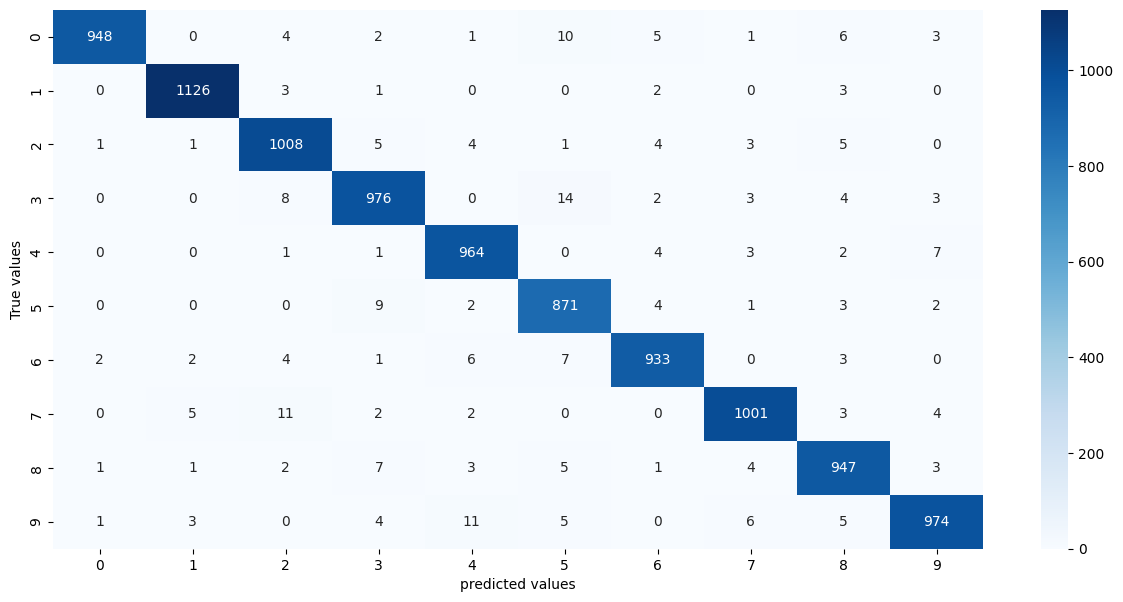

In [29]:
plt.figure(figsize = (15,7))
sns.heatmap(confusion_mat, annot = True, fmt = 'd', cmap = 'Blues')
plt.xlabel('predicted values')
plt.ylabel('True values')

Building a Predictive System

In [48]:
input_image_path = '/content/5.jpg'
input_image = cv2.imread(input_image_path)

In [49]:
print(input_image)

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 ...

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  ...
  [255 255 255]
  [255 255 255]
  [255 255 255]]]


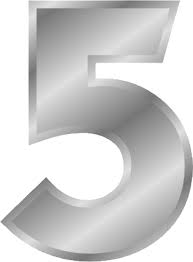

In [50]:
cv2_imshow(input_image)

In [51]:
input_image.shape

(262, 193, 3)

In [52]:
grayscale = cv2.cvtColor(input_image, cv2.COLOR_RGB2GRAY)

In [53]:
grayscale.shape

(262, 193)

In [54]:
input_image_resize = cv2.resize(grayscale, (28,28))

In [55]:
input_image_resize.shape

(28, 28)

In [56]:
cv2_imshow(input_image_resize)

In [57]:
input_image_resize = input_image_resize/255

In [58]:
image_reshaped = np.reshape(input_image_resize,[1,28,28])

In [59]:
type(image_reshaped)

numpy.ndarray

In [60]:
input_prediction = model.predict(image_reshaped)
print(input_prediction)

1/1 [==============================] - 0s 18ms/step
[[2.3929503e-17 1.8068086e-08 6.7191315e-03 1.1744750e-02 7.6233122e-13
  1.0000000e+00 1.1723346e-10 7.4882281e-01 6.1332911e-01 2.4816535e-07]]


In [61]:
input_pred_label = np.argmax(input_prediction)

In [62]:
print("The Handwritten digit is recognized as: ",input_pred_label)

The Handwritten digit is recognized as:  5
